# Importando biblioteca

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Sobre a base de dados

O conjunto de dados MNIST (Modified National Institute of Standards and Technology) é uma grande base de dados de dígitos manuscritos que é normalmente utilizada para treinar vários sistemas de processamento de imagem e modelos de aprendizagem automática. Foi criado através da "re-mistura" das amostras dos conjuntos de dados originais do NIST e tornou-se uma referência para avaliar o desempenho dos algoritmos de classificação de imagens.

# Características principais

. A MNIST contém 60.000 imagens de treino e 10.000 imagens de teste de dígitos manuscritos.  

. O conjunto de dados inclui imagens em escala de cinzentos de tamanho 28x28 pixéis.  

. As imagens são normalizadas para caberem numa caixa delimitadora de 28x28 pixéis e anti-aliased, introduzindo níveis de escala de cinzentos.  

. A MNIST é amplamente utilizada para treino e teste no domínio da aprendizagem automática, especialmente para tarefas de classificação de imagens.  


# Estrutura do conjunto de dados

O conjunto de dados MNIST está dividido em dois subconjuntos:

1. Conjunto de treino: Este subconjunto contém 60.000 imagens de dígitos manuscritos utilizados para treinar modelos de aprendizagem automática.
2. Conjunto de teste: Este subconjunto consiste em 10.000 imagens utilizadas para testar e avaliar os modelos treinados.


# Importação e Análise do Dataset

In [3]:
from tensorflow.keras.datasets import mnist

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [4]:
y_treino = pd.Series(data=y_treino)
dfreq = round(y_treino.value_counts()/len(y_treino)*100, 2)
dfreq.sort_index()
dfreq.reset_index().rename(columns={'index':'Classes', 'count':'Frequencia'}).sort_values(by='Classes')

,Classes,Frequencia
5,0,9.87
0,1,11.24
3,2,9.93
2,3,10.22
8,4,9.74
9,5,9.04
6,6,9.86
1,7,10.44
7,8,9.75
4,9,9.92


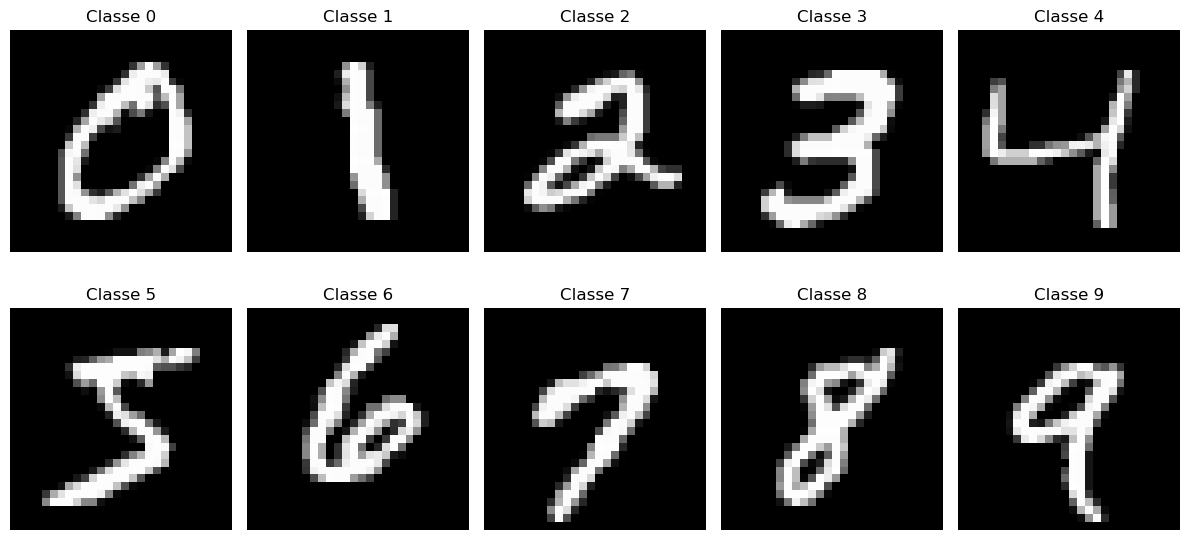

In [8]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
indices = [1, 6, 5, 7, 2, 0, 13, 15, 17, 4]

# Definindo o número de linhas e colunas para os subplots
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, idx in enumerate(indices):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(x_treino[idx], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Classe {classes[i]}')

plt.tight_layout()
plt.show()

In [9]:
x_treino.shape, x_teste.shape

((60000, 28, 28), (10000, 28, 28))

# Normalização e pre-processamento dos dados

Pelo fato do dataset ja estar praticamente preparado para uso, só teremos uma etapa de pré-processamento que será a conversão dos dados de output de treino e teste em uma matriz com colunas sendo respectivas a cada categoria/classe presenta no dataset. A outra etapa será apenas uma normalização de valores. Como os pixeis estão entre valores entre 0 e 255, iremos normalizar dividindo o valor de um pixel x por 255 para que o valor de x fique entre 0 e 1 e daremos um reshape para transformar a matriz em um array que será correspondente a uma linha do dataframe

In [5]:
#As CNNs da api do keras no tensorflow so aceitam entradas em 3 ou 4 dimensoes 
x_treino = x_treino.reshape(60000, 28, 28, 1)
x_teste = x_teste.reshape(10000, 28, 28, 1)


# Redimensionar as imagens de 28x28 para 32x32 por conta da arquitetura utilizada
x_treino = np.array([tf.image.resize(img, (32, 32)) for img in x_treino])
x_teste = np.array([tf.image.resize(img, (32, 32)) for img in x_teste])

x_treino = x_treino/255
x_teste = x_teste/255

In [6]:
from keras.utils import to_categorical

y_treino = to_categorical(y_treino) 
y_teste = to_categorical(y_teste) 

y_treino, y_teste

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

# Sobre o modelo

Usando o dataset MINIST com imagens de 28X28 pixels, foi feita a seguinte rede neural:

.Arquitetura LeNet: A LeNet é uma rede neural convolucional projetada para classificar imagens, especialmente no contexto de reconhecimento de dígitos (números de 0 a 9) em datasets como o MNIST.
.Funções de Ativação: A LeNet utiliza a função de ativação Sigmoid ou Tanh nas camadas ocultas, e a Softmax na camada de saída para converter as ativações em probabilidades de classe.

.Camada de Entrada: A LeNet tem uma camada de entrada composta por 1024 neurônios, representando os 1024 pixels de uma imagem de 32x32 onde a dimensao.

.Camadas Convolucionais e Subamostragem: A arquitetura possui duas camadas convolucionais seguidas por camadas de subamostragem (ou pooling), que ajudam a extrair características importantes das imagens. Essas camadas convolucionais usam filtros para aprender padrões como bordas e texturas.

.Camadas Ocultas e Saída: A rede conta com duas camadas densas após as camadas convolucionais, sendo a primeira com 120 neurônios e a segunda com 84 neurônios. A camada de saída possui 10 neurônios, correspondentes às 10 classes de dígitos possíveis (0 a 9).

.Otimizadores: O treinamento da LeNet pode usar o método de otimização ADAM, e sua performance é verificada ajustando os pesos para minimizar o erro.

.Função de Custo: A função de custo utilizada é a categorical_crossentropy, que mede a diferença entre a distribuição de probabilidade predita pela rede e a distribuição real das classes.

.Variáveis: A arquitetura da LeNet possui um total de 23082 parâmetros (pesos e bias).

<center><img src="../../imagens/LeNet.png"/></center>

# Compilação e treinamento dos modelos

Compilação do modelo:
A métrica usada para validação do eficiencia do modelo foi a métrica da acuracia  
A função de custo(loss ou erro, como preferir) foi definida como a categorical_crossentropy  
O otimizador como o Gradiente descendente estocàstico  

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adam

In [8]:
#Criando modelo de rede neural e adicionando as camadas
modelo = Sequential()

#Usar o padding é same, nao usar é valid
# kernel_size é o tamanho do filtro
# pool_size é o tamanho do quadrante que o pooling ira escolher o valor maximo
modelo.add(Conv2D(filters=6, kernel_size=5, activation='relu', input_shape=(32,32,1)))
modelo.add(AveragePooling2D(pool_size=(2,2), padding='valid'))

modelo.add(Conv2D(filters=16, kernel_size=5, activation='relu'))
modelo.add(AveragePooling2D(pool_size=(2,2), padding='valid'))

modelo.add(Flatten())

modelo.add(Dense(120, activation='relu', kernel_initializer='normal'))
modelo.add(Dropout(0.2))

#Adicionando camada densa recebendo 1.024 entradas
modelo.add(Dense(84, activation='relu', kernel_initializer='normal'))
modelo.add(Dropout(0.2))

#Adicionando camada de saída
modelo.add(Dense(y_treino.shape[1], activation='softmax', kernel_initializer='normal'))


In [9]:
otimizador = Adam() # Otimizador Adam

In [10]:
#Definindo a compilaçao do modelo como a função de custo sendo a cross-entropy, otimizador o Gradiente descendente estocastico, a métrica de avaliação e eficiencia do modelo sendo a acuracia
modelo.compile(loss='categorical_crossentropy', 
               optimizer=otimizador, 
               metrics=['acc'], ) 

Treinamento do modelo:  

O modelo foi treinado por 16 epochs(épocas), o que significa que ele passou pelo conjunto de dados de treinamento 16 vezes.  

Com o tamanho do lote do gradiente descendente estocástico (batch_size) igual a 100, o número de iterações por época será 600 (60.000 exemplos no conjunto de dados dividido pelo tamanho do lote de 100). Portanto, os pesos e os vieses serão atualizados 60.000 vezes ao longo de 100 épocas dentro da rede neural.  

Utilizamos os dados de teste como validação para verificar a presença de overfitting. Como o conjunto de dados não é muito grande, isso nos permite avaliar o desempenho do modelo e ajustar os hiperparâmetros de forma mais eficaz.  

In [11]:
historico = modelo.fit(x_treino, y_treino, epochs=16, batch_size=100, verbose=1, validation_data=(x_teste, y_teste))

Epoch 1/16
600/600 [==============================] - 6s 4ms/step - loss: 0.4265 - acc: 0.8678 - val_loss: 0.1156 - val_acc: 0.9642
Epoch 2/16
600/600 [==============================] - 2s 4ms/step - loss: 0.1318 - acc: 0.9609 - val_loss: 0.0694 - val_acc: 0.9778
Epoch 3/16
600/600 [==============================] - 2s 4ms/step - loss: 0.0925 - acc: 0.9724 - val_loss: 0.0600 - val_acc: 0.9813
Epoch 4/16
600/600 [==============================] - 2s 3ms/step - loss: 0.0765 - acc: 0.9773 - val_loss: 0.0541 - val_acc: 0.9833
Epoch 5/16
600/600 [==============================] - 2s 3ms/step - loss: 0.0672 - acc: 0.9803 - val_loss: 0.0437 - val_acc: 0.9860
Epoch 6/16
600/600 [==============================] - 2s 4ms/step - loss: 0.0561 - acc: 0.9831 - val_loss: 0.0418 - val_acc: 0.9880
Epoch 7/16
600/600 [==============================] - 2s 4ms/step - loss: 0.0525 - acc: 0.9843 - val_loss: 0.0326 - val_acc: 0.9895
Epoch 8/16
600/600 [==============================] - 2s 3ms/step - loss: 0.

# Teste do modelo

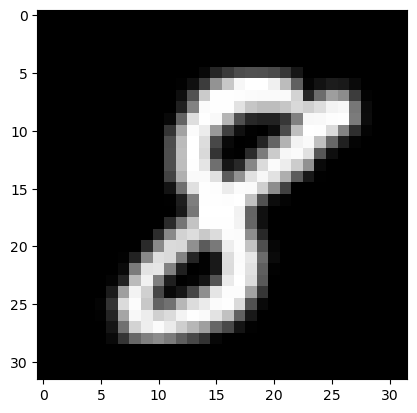

In [38]:
plt.imshow(x_treino[5281], cmap='gray')

In [40]:
exemplo = np.expand_dims(x_treino[5281], axis=0)
resposta = modelo.predict(exemplo)
for i, arr in enumerate(resposta[0]):
    if arr == 1:
        print(f'O número da imagem é {i}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
O número da imagem é 8


In [120]:
y_treino[5280] 

7

# Observações de aprendizado

Queria deixar um adendo de um detalhe que confundiu minha cabeça, o numero total de iterações por epoch se da no código abaixo:

O modelo avalia a acurácia a cada epoch(ou época, chame do que preferir), e os valores das variaveis que estão sendo alteradas(pesos e bias) mudam a cada iteração dentro do epoch

In [43]:
batch_size=100
epochs=16

total_de_iteracoes_por_epoch = len(x_treino)/batch_size
total_de_iteracoes = total_de_iteracoes_por_epoch*epochs

# O total de iterações por epoch é o total de vezes em que nosso modelo foi treinado por epoch(epoca), ou seja, o total de vezes em que os valores dos pesos e dos bias foram alterados por epoch
# O total de iterações é o total de vezes que nosso modelo foi treinado
total_de_iteracoes_por_epoch, total_de_iteracoes

(600.0, 9600.0)

# Gráficos de perfomace

Objetivos: Verificar a presença de underfiting e/ou overfiting

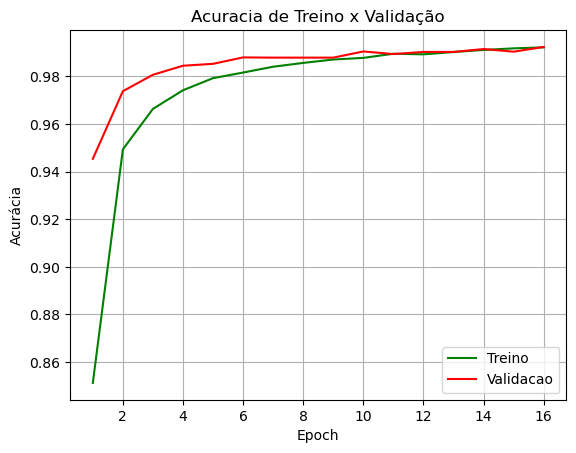

In [45]:
import matplotlib.pyplot as plt

acc_treino = historico.history['acc']
acc_validation = historico.history['val_acc']

epochs = range(1, len(acc_treino)+1)

plt.plot(epochs, acc_treino, 'g', label='Treino')
plt.plot(epochs, acc_validation, 'r', label='Validacao')
plt.grid(True)
plt.legend()
plt.title('Acuracia de Treino x Validação')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.show()

Tomando com base esse gráfico vemos que aparentemente nosso modelo não está passando pelo processo de overfitting o que é uma boa notícia